# 문제(practice 18.2)
### 아래와 같은 형태의 주기함수 f(t)가 있다. 이것의 주기를 무한대로 늘린 다음, 푸리에 변환을 적용하라.

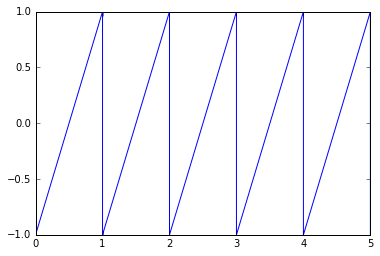

In [4]:
t = np.linspace(0, 5, 500000)
y = signal.sawtooth(2 * np.pi * t)
plt.plot(t, y)

###  주기를 무한대로 늘리면 아래처럼 하나의 톱니파만 존재하는 것처럼 보인다. $[0,1]$ 구간

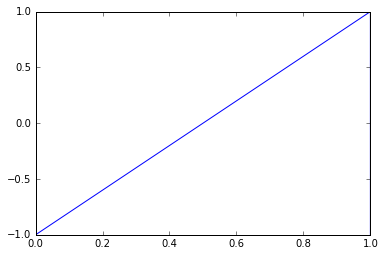

In [5]:
t = np.linspace(0, 1, 500000)
y = signal.sawtooth(2 * np.pi * t)
plt.plot(t, y)

# 1. 푸리에 변환 (정의로 풀기)

## 정의 : $F(w) = \int_{-\infty}^\infty{f(t)e^{-jwt}}dt$

## $f(t) = t[u(t)-u(t-1)]$이므로

## $F(w) = \int_0^1{tu(t)e^{-jwt}}dt$

## $\ \ \ \ \ \ \ = \int_0^1{te^{-jwt}}dt$

## 부분적분을 이용하여 $F(w)$를  구하면,

## $\int_0^1{te^{-jwt}}dt = -\frac{1}{jw}te^{-jwt}|_0^1 - (-\frac{1}{jw}\int_0^1{e^{-jwt}}dt)$

## $\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ = \frac{(1 + jw)e^{jw} - 1}{w^2}$

# 2. 미분 공식으로 풀기

## 공식 : $\mathscr{F}[f^{(n)}(t)] = (jw)^nF(w)$

## $f(t) = t[u(t)-u(t-1)] = tu(t) -(t-1)u(t-1) + u(t-1) 이므로,$

## $f'(t) = u(t) - u(t-1) + \delta(t-1),$

## $f''(t)= \delta(t) - \delta(t-1) + \delta'(t-1)$

## 이 결과를 공식에 대입하면, 

## $\mathscr{F}[f^{(2)}(t)] = (jw)^2F(w) = (jw)^2[1 - e^{-jw} -jwe^{-jw}] $

## 정리하면,

## $F(w) = \frac{[1 + e^{-jw} -jwe^{-jw}]}{(jw)^2} = \frac{(1 + jw)e^{jw} - 1}{w^2}$

# 4. 고찰

### 톱니파saw tooh로 알려진 주기함수 f(t)는 주기를 무한대로 늘림으로써 푸리에 변환을 적용할 수 있다.

### 이 경우,

## $F(w) = \frac{(1 + jw)e^{jw} - 1}{w^2}$의 값이 나왔다.

### 주기와 주파수의 반비례 관계에 따라, 주기가 길어질 경우 주파수는 점점 작아질 것이고 0Hz에 밀집될 것이다.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.pyplot as plt
import plotly.plotly as py
import numpy as np


"""
Functions for FFT
Many part of implementation is derived from plotly
https://plot.ly/
"""


def fft_configuration(period_function, T=1):
    n = len(period_function) # length of the signal

    Y = np.fft.fft(y)/n # fft computing and normalization
    Y = Y[range(int(n/2))]

    k = np.arange(n)
    frq = k/T # two sides frequency range
    frq = frq[range(int(n/2))] # one side frequency range
    return (Y, frq)


def make_plot_amp_and_freq(time_vector, period_function):
    Y, frq = fft_configuration(period_function)
    
    fig, ax = plt.subplots(2, 1, figsize=(15,15))
    
    ax[0].plot(time_vector, y)
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Amplitude')

    ax[1].plot(frq,abs(Y),'r') # plotting the spectrum
    ax[1].set_xlabel('Freq (Hz)')
    ax[1].set_ylabel('Amplitude')
    


def time_vector_configuration(one_side_width=1):
    Fs = 150.0;  # sampling rate
    Ts = 1.0/Fs; # sampling interval
    t = np.arange(
        negative(one_side_width),
        one_side_width,
        Ts) # time vector
    
    return t

In [3]:
from scipy import signal